In [1]:
#IMPORT ALL THE REQUIRED LIBERARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#  for warnings suppression
import warnings
warnings.filterwarnings('ignore')

# Set visualizations inline
%matplotlib inline

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""


In [3]:
# Load the dataset (adjust file path if needed)
admissions = pd.read_csv('ADMISSIONS.csv.gz')

# Preview the dataset
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [4]:
admissions.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0
58975,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,CATHOLIC,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1


In [5]:
# Check data types and non-null counts
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [6]:
# Checking missing values in each column
missing_values = admissions.isnull().sum()
missing_values[missing_values > 0]

DEATHTIME         53122
LANGUAGE          25332
RELIGION            458
MARITAL_STATUS    10128
EDREGTIME         28099
EDOUTTIME         28099
DIAGNOSIS            25
dtype: int64

In [7]:
# DEATHTIME: leaving as is ,missing = patient survived

# LANGUAGE: fill with 'UNKNOWN'
admissions['LANGUAGE'].fillna('UNKNOWN', inplace=True)

# RELIGION: fill with 'UNKNOWN'
admissions['RELIGION'].fillna('UNKNOWN', inplace=True)

# MARITAL_STATUS: fill with 'UNKNOWN'
admissions['MARITAL_STATUS'].fillna('UNKNOWN', inplace=True)

# DIAGNOSIS: fill with 'NOT RECORDED'
admissions['DIAGNOSIS'].fillna('NOT RECORDED', inplace=True)


In [8]:
admissions.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


In [9]:
# Check duplicates
duplicates = admissions.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')

Total duplicate rows: 0


In [10]:
# Convert string dates into datetime objects
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'])
admissions['DEATHTIME'] = pd.to_datetime(admissions['DEATHTIME'])
admissions['EDREGTIME'] = pd.to_datetime(admissions['EDREGTIME'])
admissions['EDOUTTIME'] = pd.to_datetime(admissions['EDOUTTIME'])
# Verify changes
admissions.dtypes

ROW_ID                           int64
SUBJECT_ID                       int64
HADM_ID                          int64
ADMITTIME               datetime64[ns]
DISCHTIME               datetime64[ns]
DEATHTIME               datetime64[ns]
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
DISCHARGE_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                       object
EDREGTIME               datetime64[ns]
EDOUTTIME               datetime64[ns]
DIAGNOSIS                       object
HOSPITAL_EXPIRE_FLAG             int64
HAS_CHARTEVENTS_DATA             int64
dtype: object

In [11]:
# Encode categorical data into numeric format
admissions['ADMISSION_TYPE_CODE'] = admissions['ADMISSION_TYPE'].astype('category').cat.codes

# Check changes
admissions[['ADMISSION_TYPE', 'ADMISSION_TYPE_CODE']].head()


,ADMISSION_TYPE,ADMISSION_TYPE_CODE
0,EMERGENCY,1
1,ELECTIVE,0
2,EMERGENCY,1
3,EMERGENCY,1
4,EMERGENCY,1


In [12]:
missing_values_total = admissions.isnull().sum()
missing_values_total 

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                    0
RELIGION                    0
MARITAL_STATUS              0
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                   0
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
ADMISSION_TYPE_CODE         0
dtype: int64

In [13]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                58976 non-null  int64         
 1   SUBJECT_ID            58976 non-null  int64         
 2   HADM_ID               58976 non-null  int64         
 3   ADMITTIME             58976 non-null  datetime64[ns]
 4   DISCHTIME             58976 non-null  datetime64[ns]
 5   DEATHTIME             5854 non-null   datetime64[ns]
 6   ADMISSION_TYPE        58976 non-null  object        
 7   ADMISSION_LOCATION    58976 non-null  object        
 8   DISCHARGE_LOCATION    58976 non-null  object        
 9   INSURANCE             58976 non-null  object        
 10  LANGUAGE              58976 non-null  object        
 11  RELIGION              58976 non-null  object        
 12  MARITAL_STATUS        58976 non-null  object        
 13  ETHNICITY       

In [14]:
cols_to_drop = [
    "ROW_ID",
    "DIAGNOSIS",          # High cardinality text, usually drop
    "EDREGTIME",          # Timestamp
    "EDOUTTIME",          # Timestamp
    "ADMITTIME",          # Timestamp
    "DISCHTIME",          # Timestamp
    "DEATHTIME",          # Timestamp
    "LANGUAGE",           # Many categories, often not useful
    "RELIGION",           # Many categories, often sparse
]
admissions_cleaned = admissions.copy()
admissions_cleaned = admissions_cleaned.drop(columns=cols_to_drop, errors="ignore")


In [15]:
# Verify first
print(admissions_cleaned.head())

# Then clearly save it
admissions_cleaned.to_csv('admissions_cleaned.csv', index=False)

   SUBJECT_ID  HADM_ID ADMISSION_TYPE         ADMISSION_LOCATION  \
0          22   165315      EMERGENCY       EMERGENCY ROOM ADMIT   
1          23   152223       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2          23   124321      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3          24   161859      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4          25   129635      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE MARITAL_STATUS ETHNICITY  \
0  DISC-TRAN CANCER/CHLDRN H   Private        MARRIED     WHITE   
1           HOME HEALTH CARE  Medicare        MARRIED     WHITE   
2           HOME HEALTH CARE  Medicare        MARRIED     WHITE   
3                       HOME   Private         SINGLE     WHITE   
4                       HOME   Private        MARRIED     WHITE   

   HOSPITAL_EXPIRE_FLAG  HAS_CHARTEVENTS_DATA  ADMISSION_TYPE_CODE  
0                     0                     1                    1  
1                     0                     1     

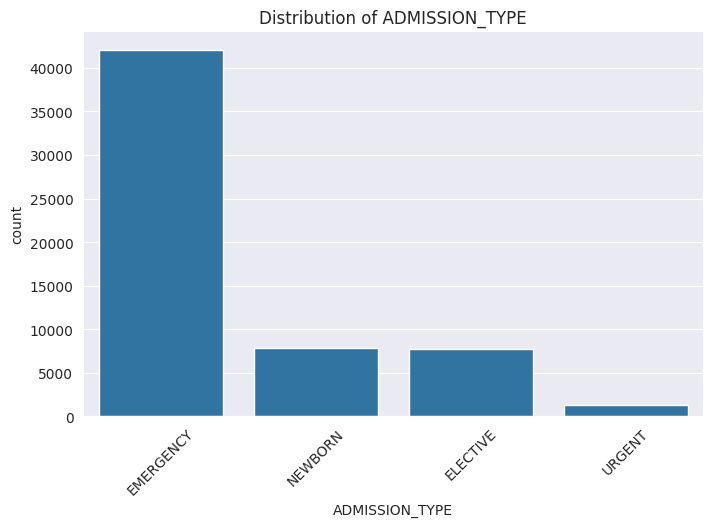

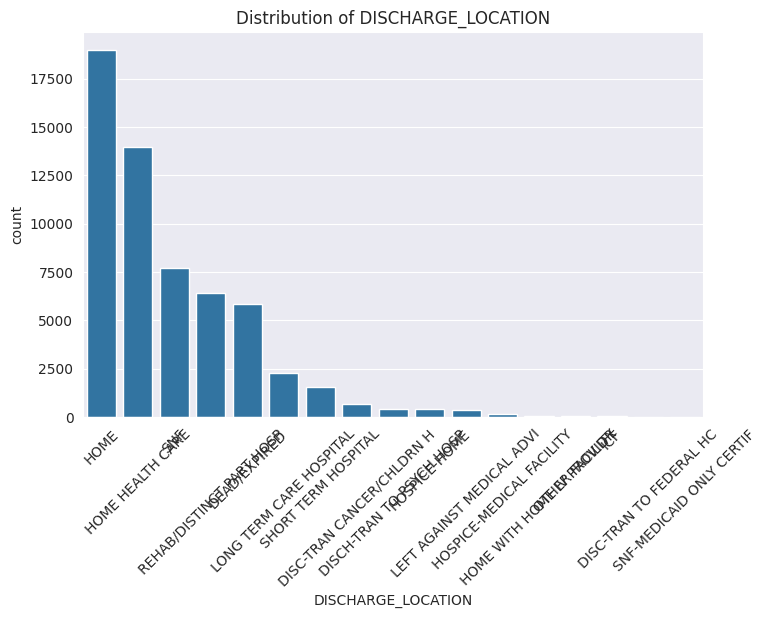

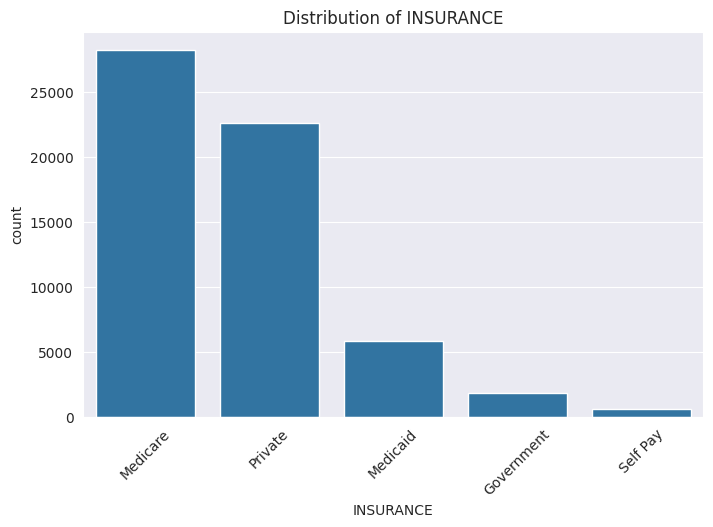

In [16]:
# Univariate Analysis: Categorical Variables
categorical_cols = ['ADMISSION_TYPE','DISCHARGE_LOCATION', 'INSURANCE']

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=admissions_cleaned, x=col, order=admissions_cleaned[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

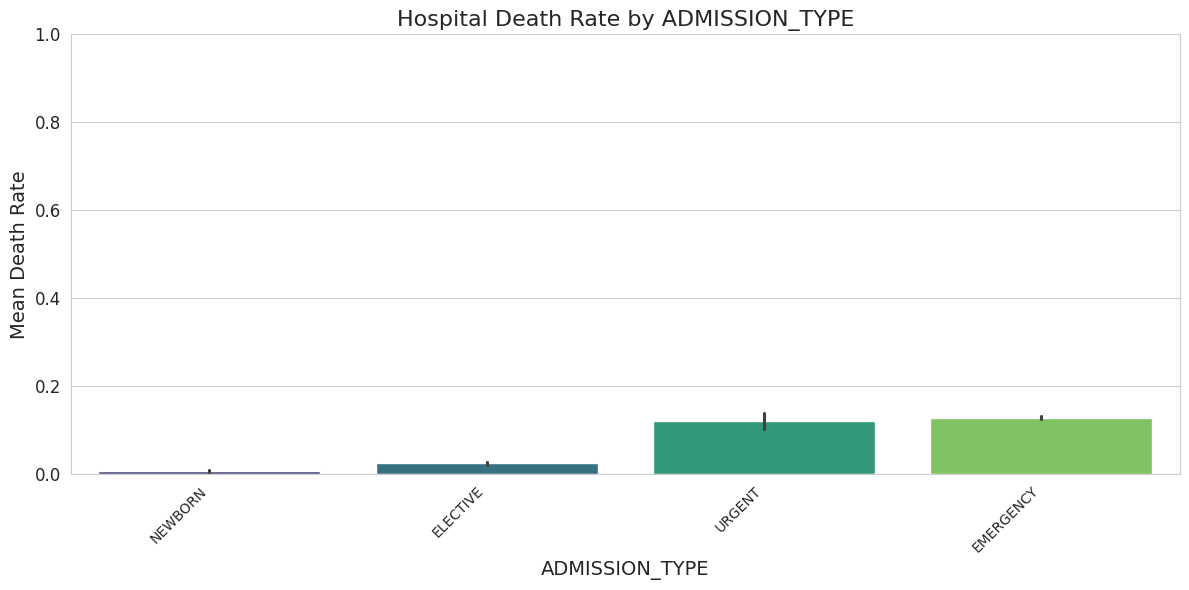

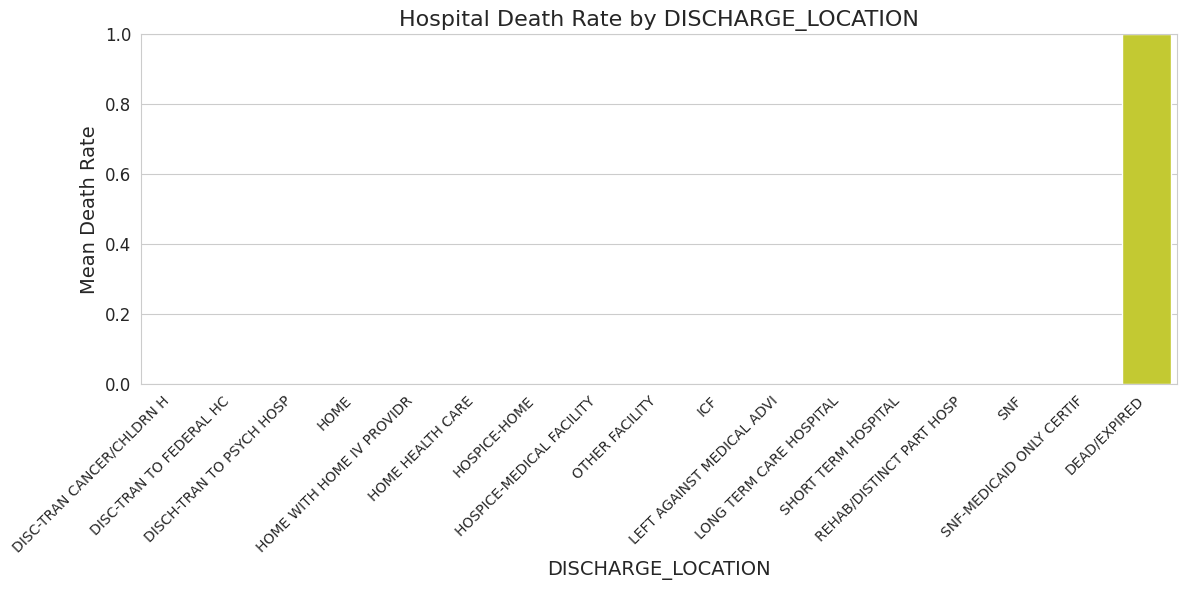

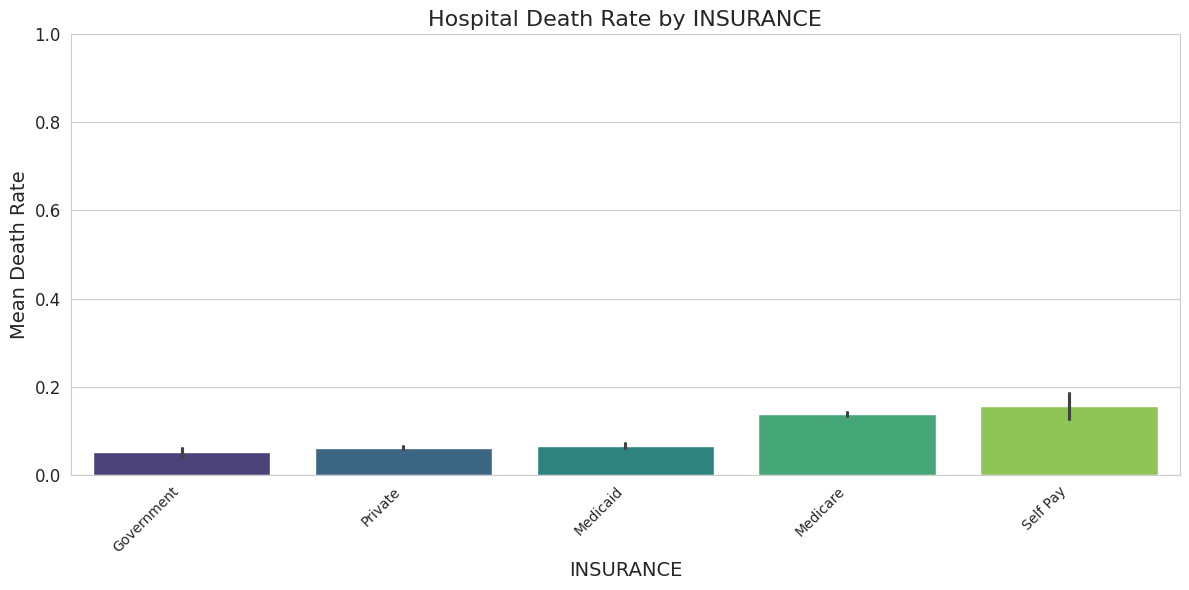

In [17]:
#  Seaborn style
sns.set_style('whitegrid')

# Bivariate Analysis: Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(12,6)) 
    
    # Sort categories by mean death rate 
    category_order = admissions_cleaned.groupby(col)['HOSPITAL_EXPIRE_FLAG'].mean().sort_values().index
    
    sns.barplot(
        x=col,
        y='HOSPITAL_EXPIRE_FLAG',
        data=admissions_cleaned,
        order=category_order,   # sort bars
        palette='viridis'       #  color palette
    )
    
    plt.title(f"Hospital Death Rate by {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Mean Death Rate', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate & right-align labels
    plt.yticks(fontsize=12)
    
    plt.ylim(0, 1)  # Death rate must be between 0 and 1
    plt.tight_layout()
    plt.show()

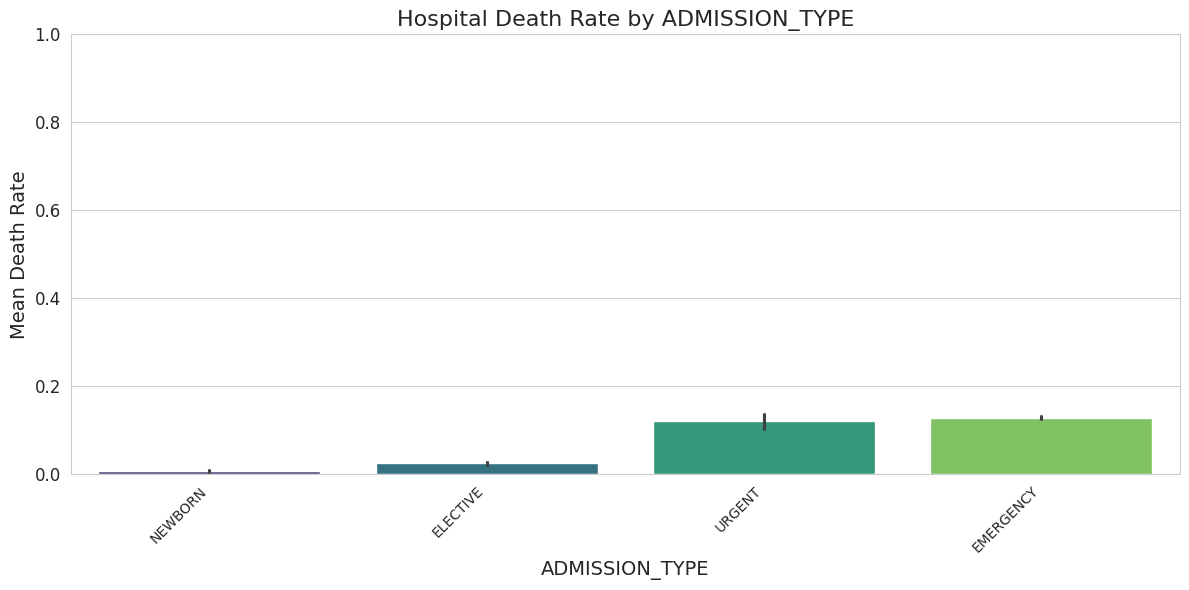

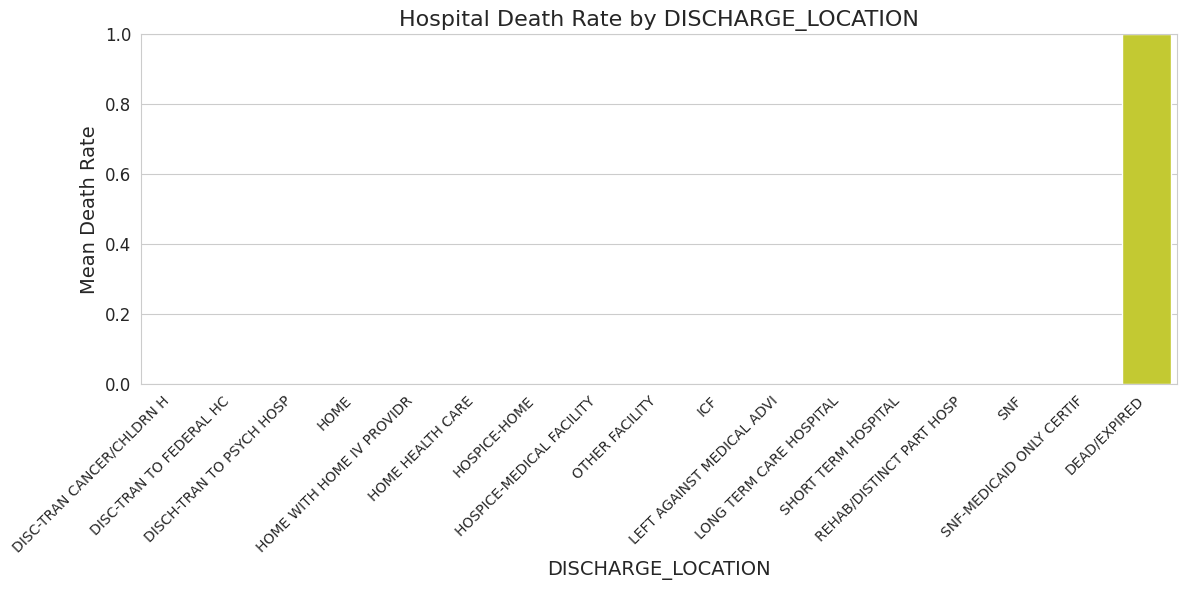

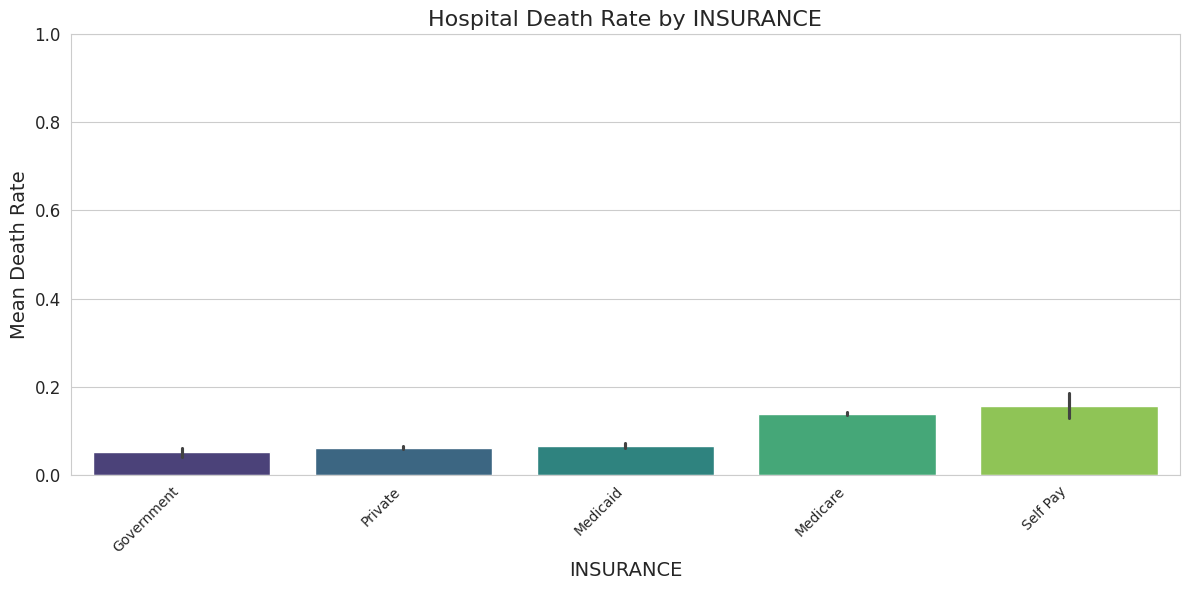

In [18]:
#  Seaborn style
sns.set_style('whitegrid')

# Bivariate Analysis: Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(12,6)) 
    
    # Sort categories by mean death rate 
    category_order = admissions_cleaned.groupby(col)['HOSPITAL_EXPIRE_FLAG'].mean().sort_values().index
    
    sns.barplot(
        x=col,
        y='HOSPITAL_EXPIRE_FLAG',
        data=admissions_cleaned,
        order=category_order,   # sort bars
        palette='viridis'       #  color palette
    )
    
    plt.title(f"Hospital Death Rate by {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Mean Death Rate', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate & right-align labels
    plt.yticks(fontsize=12)
    
    plt.ylim(0, 1)  # Death rate must be between 0 and 1
    plt.tight_layout()
    plt.show()

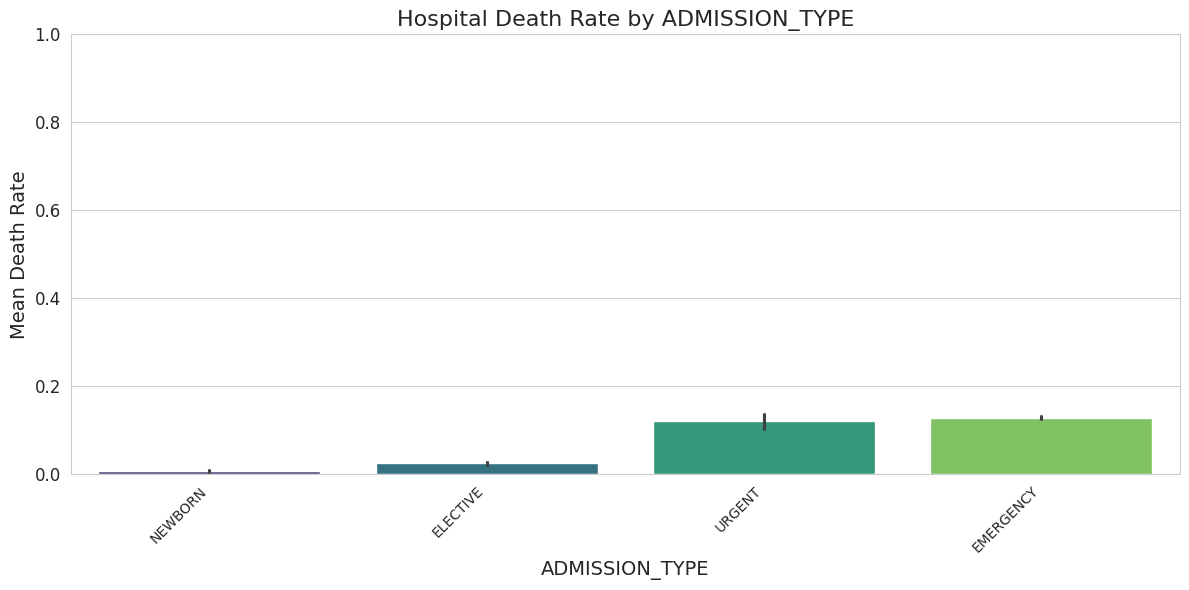

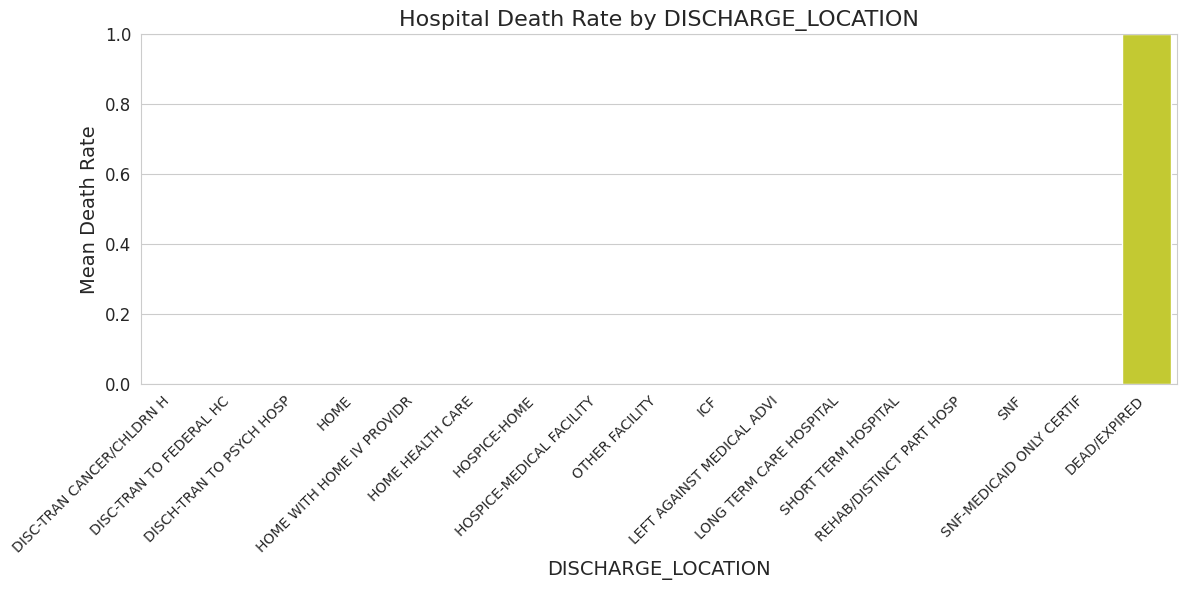

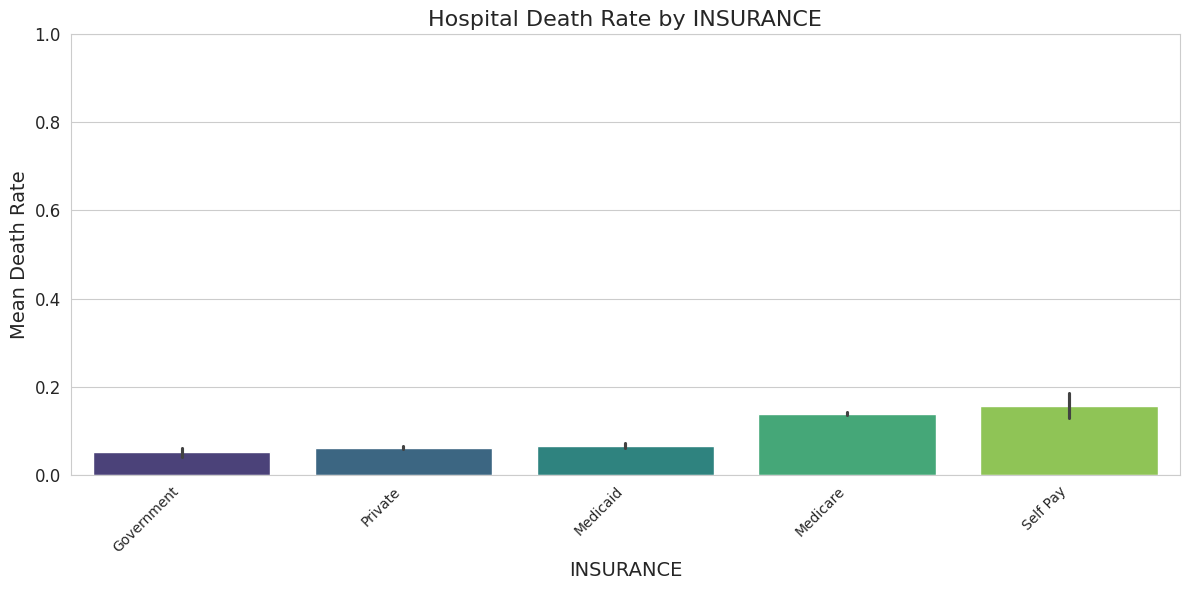

In [19]:
#  Seaborn style
sns.set_style('whitegrid')

# Bivariate Analysis: Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(12,6)) 
    
    # Sort categories by mean death rate 
    category_order = admissions_cleaned.groupby(col)['HOSPITAL_EXPIRE_FLAG'].mean().sort_values().index
    
    sns.barplot(
        x=col,
        y='HOSPITAL_EXPIRE_FLAG',
        data=admissions_cleaned,
        order=category_order,   # sort bars
        palette='viridis'       #  color palette
    )
    
    plt.title(f"Hospital Death Rate by {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Mean Death Rate', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate & right-align labels
    plt.yticks(fontsize=12)
    
    plt.ylim(0, 1)  # Death rate must be between 0 and 1
    plt.tight_layout()
    plt.show()

In [20]:
!pip install sdv


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [21]:
import sdv
print(sdv.__version__)

1.24.1


In [22]:
# Imports
 
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

In [23]:
admissions_cleaned = pd.read_csv('admissions_cleaned.csv')
admissions_cleaned.head()

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMISSION_TYPE_CODE
0,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,MARRIED,WHITE,0,1,1
1,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,MARRIED,WHITE,0,1,0
2,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,MARRIED,WHITE,0,1,1
3,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,SINGLE,WHITE,0,1,1
4,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,0,1,1


In [24]:
# Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

admissions_cleaned = pd.read_csv("admissions_cleaned.csv")

#  Generate metadata for SINGLE TABLE
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(admissions_cleaned)

# Initialize synthesizer (no enforce_minimal in this version)
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    epochs=30,
)

#  Fit the synthesizer to the data
synthesizer.fit(admissions_cleaned)

synthetic_same_size = synthesizer.sample(num_rows=len(admissions_cleaned))
synthetic_data = synthesizer.sample(num_rows=1000)

#  Save synthetic data
synthetic_data.to_csv("synthetic_admissions.csv", index=False)

# Preview
synthetic_data.head()

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMISSION_TYPE_CODE
0,79210,6853970,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,SINGLE,WHITE,0,1,1
1,3454,6262919,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,UNKNOWN,WHITE,0,1,2
2,88457,2899503,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,MARRIED,WHITE,0,1,1
3,79482,11787770,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN TO FEDERAL HC,Medicaid,UNKNOWN,WHITE,0,1,1
4,3899,3831346,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,UNKNOWN,WHITE,0,1,1


In [25]:
# Step 1: Fit the model 
synthesizer.fit(admissions_cleaned)

In [26]:
# Now sampling again
synthetic_data = synthesizer.sample(num_rows=1000)
synthetic_data.to_csv("synthetic_admissions.csv", index=False)
synthetic_data.head()

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMISSION_TYPE_CODE
0,80399,11889172,EMERGENCY,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Private,SINGLE,WHITE,0,0,0
1,23596,9893139,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,MARRIED,WHITE,0,1,1
2,84452,5089916,EMERGENCY,EMERGENCY ROOM ADMIT,LONG TERM CARE HOSPITAL,Medicare,WIDOWED,UNABLE TO OBTAIN,0,1,1
3,71443,7932835,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicaid,SINGLE,OTHER,0,1,0
4,66179,14453510,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,MARRIED,WHITE,0,1,0


In [27]:
print("Synthesizer fitted:", synthesizer._fitted)


Synthesizer fitted: True


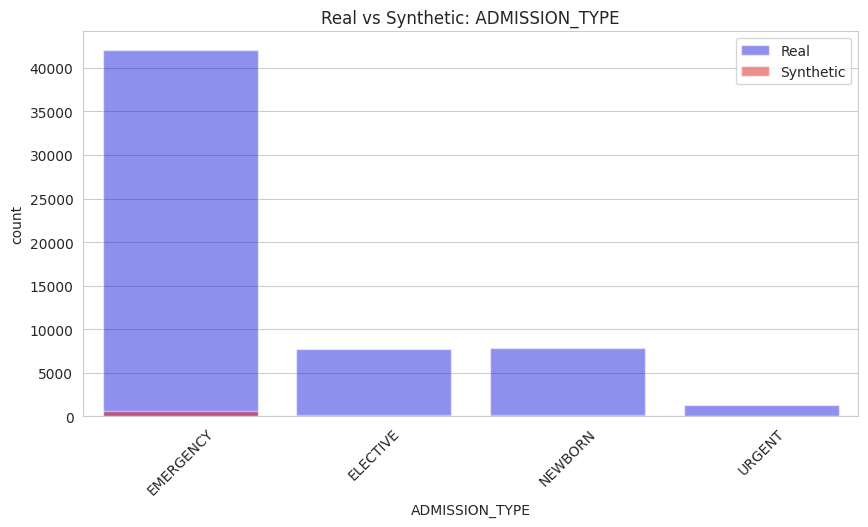

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Compare distributions of a categorical column
column = 'ADMISSION_TYPE'

plt.figure(figsize=(10,5))

# Real data
sns.countplot(x=column, data=admissions_cleaned, color='blue', label='Real', alpha=0.5)

# Synthetic data
sns.countplot(x=column, data=synthetic_data, color='red', label='Synthetic', alpha=0.5)

plt.legend()
plt.title(f"Real vs Synthetic: {column}")
plt.xticks(rotation=45)
plt.show()


In [29]:
 # Load synthetic dataset

synthetic = pd.read_csv("synthetic_admissions.csv")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#  Predict HOSPITAL_EXPIRE_FLAG using synthetic vs real
features = ['ADMISSION_TYPE','INSURANCE','ETHNICITY']
target = 'HOSPITAL_EXPIRE_FLAG'

# Preprocessing (convert categories to codes)
for col in features:
    admissions_cleaned[col] = admissions_cleaned[col].astype('category').cat.codes
    synthetic[col] = synthetic[col].astype('category').cat.codes

# Real data model
X_real = admissions_cleaned[features]
y_real = admissions_cleaned[target]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3)

model_real = RandomForestClassifier()
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

# Synthetic data model
X_syn = synthetic[features]
y_syn = synthetic[target]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_syn, y_syn, test_size=0.3)

model_syn = RandomForestClassifier()
model_syn.fit(Xs_train, ys_train)
syn_acc = accuracy_score(ys_test, model_syn.predict(Xs_test))

print(f" Model accuracy on real data:     {real_acc:.2f}")
print(f" Model accuracy on synthetic data: {syn_acc:.2f}")


 Model accuracy on real data:     0.90
 Model accuracy on synthetic data: 0.88


In [30]:
#  Import TVAESynthesizer
from sdv.single_table import TVAESynthesizer

#  Initialize VAE synthesizer
vae_synthesizer = TVAESynthesizer(
    metadata=metadata,
    epochs=30  # Same as CTGAN for fair comparison
)

# Fit the VAE synthesizer
vae_synthesizer.fit(admissions_cleaned)

#  Sample synthetic data using VAE
synthetic_data_vae = vae_synthesizer.sample(num_rows=1000)

#  Save VAE synthetic data
synthetic_data_vae.to_csv('synthetic_admissions_vae.csv', index=False)

#  Preview VAE synthetic data
synthetic_data_vae.head()


,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMISSION_TYPE_CODE
0,93381,11889172,1,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,2,WIDOWED,13,0,1,1
1,1270,9893139,1,TRANSFER FROM HOSP/EXTRAM,SNF,2,SINGLE,36,0,1,1
2,25750,5089916,2,PHYS REFERRAL/NORMAL DELI,HOME,1,UNKNOWN,13,0,1,2
3,28472,7932835,1,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,2,WIDOWED,36,0,1,1
4,16500,14453510,2,PHYS REFERRAL/NORMAL DELI,DISC-TRAN CANCER/CHLDRN H,3,UNKNOWN,35,0,1,2


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your synthetic data generated from VAE
synthetic_vae = pd.read_csv('synthetic_admissions_vae.csv')

# Preprocessing: convert categorical columns to numeric codes (if not already)
features = ['ADMISSION_TYPE','INSURANCE','ETHNICITY']
target = 'HOSPITAL_EXPIRE_FLAG'

# Make sure all datasets are prepared
for col in features:
    admissions_cleaned[col] = admissions_cleaned[col].astype('category').cat.codes
    synthetic_vae[col] = synthetic_vae[col].astype('category').cat.codes

# Real data model (already trained if you want, but re-training to be safe)
X_real = admissions_cleaned[features]
y_real = admissions_cleaned[target]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

model_real = RandomForestClassifier(random_state=42)
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

# VAE Synthetic data model
X_vae = synthetic_vae[features]
y_vae = synthetic_vae[target]
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vae, y_vae, test_size=0.3, random_state=42)

model_vae = RandomForestClassifier(random_state=42)
model_vae.fit(Xv_train, yv_train)
vae_acc = accuracy_score(yv_test, model_vae.predict(Xv_test))

# Show results
print(f" Model accuracy on real data:       {real_acc:.2f}")
print(f" Model accuracy on VAE synthetic data: {vae_acc:.2f}")


 Model accuracy on real data:       0.90
 Model accuracy on VAE synthetic data: 0.92


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#  Minimal Planar Flow Layer
class PlanarFlow(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.u = nn.Parameter(torch.randn(1, dim))
        self.w = nn.Parameter(torch.randn(1, dim))
        self.b = nn.Parameter(torch.randn(1))

    def forward(self, z):
        h = torch.tanh(torch.matmul(z, self.w.T) + self.b)
        z_new = z + self.u * h
        psi = (1 - h**2) * self.w
        log_det = torch.log(torch.abs(1 + torch.matmul(psi, self.u.T)) + 1e-8)
        return z_new, log_det

# Flow-VAE Model
class FlowVAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10, hidden=64):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(nn.Linear(input_dim, hidden), nn.ReLU(), nn.Linear(hidden, hidden), nn.ReLU())
        self.mu = nn.Linear(hidden, latent_dim)
        self.logvar = nn.Linear(hidden, latent_dim)
        self.decoder = nn.Sequential(nn.Linear(latent_dim, hidden), nn.ReLU(), nn.Linear(hidden, input_dim), nn.Sigmoid())
        self.flow = PlanarFlow(latent_dim)

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.mu(h), self.logvar(h)
        std = torch.exp(0.5 * logvar)
        z0 = mu + std * torch.randn_like(std)
        z1, log_det = self.flow(z0)
        x_hat = self.decoder(z1)
        return x_hat, mu, logvar, z0, z1, log_det

# Loss Function
def loss_fn(x, x_hat, mu, logvar, z0, z1, log_det):
    recon = F.binary_cross_entropy(x_hat, x, reduction='sum')
    log_qz0 = -0.5 * torch.sum(logvar + ((z0 - mu)**2) / torch.exp(logvar))
    log_pz1 = -0.5 * torch.sum(z1**2)
    return recon + (log_qz0 - log_pz1 - log_det.sum())


#  Data Preparation
features = ['ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY']
target = 'HOSPITAL_EXPIRE_FLAG'

# Encode categorical features
for col in features + [target]:
    admissions_cleaned[col] = LabelEncoder().fit_transform(admissions_cleaned[col])

# Convert to torch tensor
from sklearn.preprocessing import MinMaxScaler

# Scale input features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(admissions_cleaned[features + [target]])

# Convert to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)


#  Model Initialization and Training
input_dim = X_tensor.shape[1]
flow_vae_model = FlowVAE(input_dim=input_dim)
optimizer = torch.optim.Adam(flow_vae_model.parameters(), lr=1e-3)

print("Training Flow-VAE")
for epoch in range(20):
    flow_vae_model.train()
    x_hat, mu, logvar, z0, z1, log_det = flow_vae_model(X_tensor)
    loss = loss_fn(X_tensor, x_hat, mu, logvar, z0, z1, log_det)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}: Loss = {loss.item():.2f}")

#Synthetic Data Generation
print("Generating synthetic data")
n_samples = 10000
latent_dim = flow_vae_model.latent_dim
z = torch.randn(n_samples, latent_dim)

with torch.no_grad():
    synthetic_tensor = flow_vae_model.decoder(z).cpu()

synthetic_df = pd.DataFrame(synthetic_tensor.numpy(), columns=features + [target])
for col in features + [target]:
    synthetic_df[col] = synthetic_df[col].round().astype(int)

synthetic_df.to_csv("synthetic_admissions_flowvae.csv", index=False)
print(" Synthetic data saved to 'synthetic_admissions_flowvae.csv'")



Training Flow-VAE
Epoch 1: Loss = 616919.75
Epoch 2: Loss = 608715.75
Epoch 3: Loss = 598488.62
Epoch 4: Loss = 590801.75
Epoch 5: Loss = 583806.38
Epoch 6: Loss = 578748.81
Epoch 7: Loss = 574177.25
Epoch 8: Loss = 571841.38
Epoch 9: Loss = 565201.94
Epoch 10: Loss = 563980.00
Epoch 11: Loss = 559902.94
Epoch 12: Loss = 552930.50
Epoch 13: Loss = 551014.88
Epoch 14: Loss = 543567.62
Epoch 15: Loss = 538563.38
Epoch 16: Loss = 534107.50
Epoch 17: Loss = 529622.25
Epoch 18: Loss = 525578.00
Epoch 19: Loss = 524551.50
Epoch 20: Loss = 517936.19
Generating synthetic data
 Synthetic data saved to 'synthetic_admissions_flowvae.csv'


In [33]:
'''import torch
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#  Step 1: Generate Synthetic Data from Trained Flow-VAE 
n_samples = 10000  # adjust as needed
latent_dim = flow_vae_model.latent_dim  # make sure this exists
features = ['ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY']
target = 'HOSPITAL_EXPIRE_FLAG'

# Generate latent vectors and decode
z = torch.randn(n_samples, latent_dim)
with torch.no_grad():
    synthetic_data_tensor = flow_vae_model.decoder(z).cpu()

# Convert to DataFrame and name columns
synthetic_df = pd.DataFrame(synthetic_data_tensor.numpy(), columns=features + [target])

# Round/convert float columns to int for categorical values
for col in features + [target]:
    synthetic_df[col] = synthetic_df[col].round().astype(int)

# Save the synthetic data (optional, but used below)
synthetic_df.to_csv('synthetic_admissions_flowvae.csv', index=False)

# Step 2: Load the Saved Synthetic Data
synthetic_flowvae = pd.read_csv('synthetic_admissions_flowvae.csv')

#  Step 3: Encode categorical features consistently 
for col in features:
    admissions_cleaned[col] = admissions_cleaned[col].astype('category').cat.codes
    synthetic_flowvae[col] = synthetic_flowvae[col].astype('category').cat.codes

#  Step 4: Real Data Model 
X_real = admissions_cleaned[features]
y_real = admissions_cleaned[target]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

model_real = RandomForestClassifier(random_state=42)
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

# Step 5: Flow-VAE Synthetic Data Model
X_fvae = synthetic_flowvae[features]
y_fvae = synthetic_flowvae[target]
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_fvae, y_fvae, test_size=0.3, random_state=42)

model_fvae = RandomForestClassifier(random_state=42)
model_fvae.fit(Xf_train, yf_train)
fvae_acc = accuracy_score(yf_test, model_fvae.predict(Xf_test))

#Step 6: Print Results
print(f" Model accuracy on real data:          {real_acc:.2f}")
print(f" Model accuracy on Flow-VAE synthetic: {fvae_acc:.2f}")


SyntaxError: incomplete input (2963903184.py, line 1)

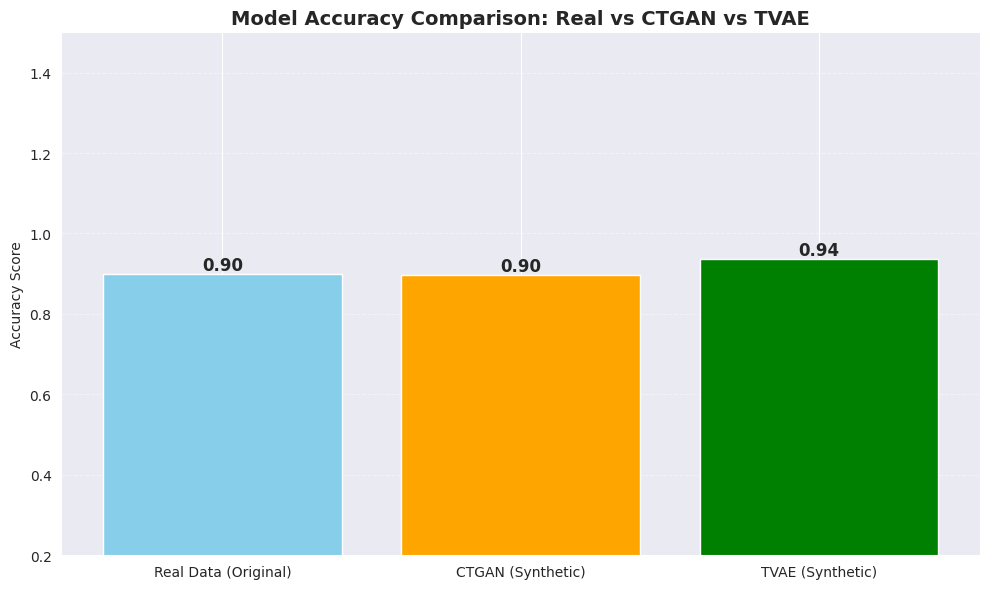

In [81]:

import matplotlib.pyplot as plt

#  accuracy values
# These are from your previous results:
real_acc = real_acc          # Accuracy on real data using real training
vae_acc = vae_acc           # Accuracy on synthetic VAE data
gan_acc = syn_acc           # Accuracy on synthetic GAN (CTGAN) data
# Prepare bar chart data
labels = ['Real Data (Original)', 'CTGAN (Synthetic)', 'TVAE (Synthetic)']
accuracy_scores = [real_acc, gan_acc, vae_acc]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_scores, color=['skyblue', 'orange', 'green'])

#  chart elements
plt.title('Model Accuracy Comparison: Real vs CTGAN vs TVAE', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score')
plt.ylim(0.2, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
